# GPHY 491-591: Lab 3

Written by Cascade Tuholske, Jan. 2024

![Richmond](./assets/richmond.png)

## Goals
The goal of Lab 3 is to use our new knowledge of `Pandas`, `GeoPandas` and `Rasterio` to create a human-environment geospatial data to investigate the relationship between socioeconomic status, green space, and temperature in Los Angeles, California. In urban areas, the distribution of materials such as asphalt and concrete has been shown to lead to higher surface and air temperatures compared to rural counterparts. This is known as the urban heat island (UHI) effect. High temperatures can be harmful to the health of residents, and in order to mitigate the UHI cities adopt strategies like increasing tree cover to increase shade and cooling, or increasing the reflectivity, also called albedo, with white paint. 

It has been shown that within most cities, the UHI and exposure to extreme heat is most pronounced in neighbhorhoods who house the most structuralized margalized. The image above is from a wonderful [article](https://www.nytimes.com/interactive/2020/08/24/climate/racism-redlining-cities-global-warming.html) in the New York Times about racist redlining policies, green space, and heat exposure in Richmond, VA. **The question is: how are datasets like the one used in this article created?**

To answer this question, you will combine demographic and socioeconomic data from the LA Times ([read about it here](http://maps.latimes.com/neighborhoods)) and remote sensed data from [Landsat satellites](https://landsat.gsfc.nasa.gov). Not only will you become familiar with a suite of Python tools, you will learn about a bit about physics, spatial uncertainty, demography, and environmental justice. In  short, you will assemble and analyze a dataset that captures a snapshot of approximate average midday temperatures in May and August, the amount of vegetation, and a host of social/economic data across each neighborhood in the county of Los Angeles. 

In terms of new Python tools, you will be given a series of custom [functions](https://www.codecademy.com/learn/cspath-cs-101/modules/cspath-python-functions/cheatsheet). We will cover functions in detail in lecture, but I want to give you a chance to see what they are and how they will speed up your code. Don't worry if they don't fully make sense.

# Part 1
Here you will cover the basics of functions. You define functions using the `def` key word and you use `()` to state the parameters (or arguments) that the function needs to be passed to be implemented. Not all functions require parameters. A few things to note: 
1. Variables assigned within a function are local (e.g. exist within the function) and those outside functions are global (e.g. accessable by all parts of your code). 
2. To get the output of a function, you must use the key word `return`

In [1]:
# Simple function
def my_func(x, y):
    ans = x * y
    return ans

In [2]:
# Run this code
x = 1
y = 2
ans = my_func(x, y)
ans

2

In [3]:
# Run this code
z = 7
c = 12
ans = my_func(z, c)
ans

84

In [4]:
# Run this code
z = 7
c = 12
ans = my_func(x = z, y = c)
print(ans)
print('x', x)
print('y', y)

84
x 1
y 2


Notice that `x` and `y` are not reassigned the values inside `my_fun(x = z, y = c)` but are called locally by `my_func`. <br>

You can also call functions within functions. Or, even create functions inside functions. Don't worry about this for now, but I do want you to play with the examples below.

In [5]:
# Run this code
def my_helper(x):
    ans = x**2
    return ans

In [6]:
# Run this code
ans = my_func(x = z, y = c)
print(ans)
ans = my_func(x = my_helper(z), y = c)
print(ans)
print(z)

84
588
7


In [7]:
# Run this code
def my_new_func(x, y):
    
    x2 = my_helper(x)
    
    ans = x2 * y
    
    return ans

In [8]:
z = 7
c = 12
ans = my_new_func(x = z, y = c)
print(ans)

588


### Question 1: 
Explain what four code cells above above did.

**Answer** The four cells above executed the follow:

1. define a function called `my_helper` that squares a number `x`.
2. Passes `z` to `x` and `c` to `y`, for the function `my _func`, which returns product of two numbers. And then applies runs `my_helper` on z, before applying `my_function` to `z` and `c`.
3. defines a new fucntion `my_new_func` that is passed two numbers, `x` and `y` and returns the product of `x2` and y`.
4. Runs `my_new_func`

Adding comments tripple quote docstring is very important to documenting functions. Admittedly, the functions I provide later in this lab are poorly documented. Don't me like me - be good at documenting your code. 

In [9]:
# Run this code
def my_new_func(x, y):
    
    """ Function that squares the first value and then multiplies it by the second value. Returns an answer:
    
    ans = x**2 * y
    
    Parameters
    ----------
    x = number to be squared
    y = number to be multiplied. 

    """
    
    x2 = my_helper(x) # See my_helper for details
    
    ans = x2 * y
    
    return ans

In [10]:
# Run this code
help(my_new_func)

Help on function my_new_func in module __main__:

my_new_func(x, y)
    Function that squares the first value and then multiplies it by the second value. Returns an answer:
    
    ans = x**2 * y
    
    Parameters
    ----------
    x = number to be squared
    y = number to be multiplied.



# Part 2
We are now going to dive into the the neighbhorhood-level socioeconomic and demographic data provide by the LA Times. You are lucky - I downloaded this data for you to use. But you will have to merge the files I downloaded.

In [11]:
# Import Depedencies
import os
from glob import glob
import numpy as np
import pandas as pd
import geopandas as gpd
import rasterio 
from rasterstats import zonal_stats
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# set up your file path
file_path = os.path.join('/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/')

In [13]:
# Open shape files with neigbhorhood boundaries
neighborhoods_fn = os.path.join(file_path, 'la_county/la_county.shp')
neighborhoods = gpd.read_file(neighborhoods_fn)

### On your own ...

In [14]:
# Check out the columns of neighborhoods
neighborhoods.columns

Index(['Name', 'Descriptio', 'geometry'], dtype='object')

In [15]:
# Check out the shape of neighborhoods
neighborhoods.shape

(272, 3)

<Axes: >

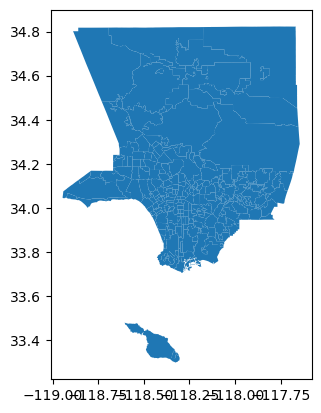

In [16]:
# Make a quick plot of neighborhoods
neighborhoods.plot()

### Question 2: 
What data does neighborhoods provide, if any at all?

`Neighbhorhoods` is a vector dataset of neighbhorhood boundries for Los Angelas County. 

### Let's look at the socioeconomic files.

In [17]:
# Make a new file path
se_dir = os.path.join(file_path, 'socioeconomic/')

In [18]:
# use glob and the wildcard * to look at the files in se_dir
my_files = glob(se_dir+'*')
my_files

['/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/socioeconomic/LA-popdensity.csv',
 '/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/socioeconomic/LA-crime.csv',
 '/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/socioeconomic/LA-white.csv',
 '/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/socioeconomic/LA-homeowner.csv',
 '/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/socioeconomic/LA-latino.csv',
 '/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/socioeconomic/LA-single_parent.csv',
 '/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/socioeconomic/LA-black.csv',
 '/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/socioeconomic/LA-diversity.csv',
 '/home/group/earthsciences/gphy591/github/GPHY-491-591/materials/Day5/data/Lab3/socioeconomic/LA-

### Question 3: 
What type of object does `glob` produce?

`glob` is a unix style pathname file pattern expansion which returns the files as a list in a directory based on a the string passed.

In [19]:
# Make a DataFrame to Merge the Files 
df_out = neighborhoods[['Name']]
df_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col

/tmp/ipykernel_3487832/2062887640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col


In [20]:
# loop through files and write out csv
for fn in os.listdir(se_dir):
    
    col = fn.split('LA-')[1].split('.csv')[0] # Get col name
    df = pd.read_csv(se_dir+fn) # open the fn

    if df.shape[1] == 3:
        df_out = df_out.merge(df.iloc[:,1:3], on = 'NEIGHBORHOOD', how = 'left') # merge 
    
    elif df.shape[1] == 4: # crime
        df_out = df_out.merge(df.iloc[:,1:4], on = 'NEIGHBORHOOD', how = 'left') # merge
        df_out.rename(columns = {'PER CAPITA' : "CRIME PER CAPITA"}, inplace = True)
        df_out.rename(columns = {'TOTAL' : "CRIME TOTAL"}, inplace = True)

In [21]:
# Check out df_out
df_out.head()

,NEIGHBORHOOD,POPULATION PER SQMI,CRIME PER CAPITA,CRIME TOTAL,WHITE POPULATION,HOMEOWNERS,LATINO POPULATION,SINGLE PARENTS,BLACK POPULATION,DIVERSITY INDEX,ASIAN POPULATION,MEDIAN INCOME
0,Acton,166.0,0.0,0.0,0.82,0.88,0.12,0.09,0.01,0.316,0.02,83983.0
1,Adams-Normandie,21848.0,30.3,56.0,0.06,0.21,0.62,0.24,0.25,0.545,0.05,29606.0
2,Adams-Normandie,21848.0,29606.0,NaN,0.06,0.21,0.62,0.24,0.25,0.545,0.05,29606.0
3,Agoura Hills,2495.0,0.0,0.0,0.83,0.84,0.07,0.10,0.01,0.304,0.06,117608.0
4,Agua Dulce,99.0,0.0,0.0,0.84,0.87,0.11,0.05,0.00,0.282,0.00,106078.0


In [22]:
# write csv
fn_out = os.path.join('./data/', 'LA-all-SE-data') # SE = socioeconomic
df_out.to_csv(fn_out+'.csv', index = False)

In [23]:
# write shape file
gdf_out = neighborhoods[['Name','geometry']] # get name and geom
gdf_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col
gdf_out = df_out.merge(gdf_out, on = 'NEIGHBORHOOD', how = 'right') # merge the data
gdf_out = gpd.GeoDataFrame(gdf_out) # cast to GeoPandas DF
gdf_out.to_file(fn_out+'.shp', index = False) # save

/tmp/ipykernel_3487832/869161722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col
/tmp/ipykernel_3487832/869161722.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_out.to_file(fn_out+'.shp', index = False) # save


### On your own ...

In [24]:
# Load the merged SE .csv file and make sure it looks okay
fn_out = os.path.join('./data/', 'LA-all-SE-data.csv')
pd.read_csv(fn_out).head()

,NEIGHBORHOOD,POPULATION PER SQMI,CRIME PER CAPITA,CRIME TOTAL,WHITE POPULATION,HOMEOWNERS,LATINO POPULATION,SINGLE PARENTS,BLACK POPULATION,DIVERSITY INDEX,ASIAN POPULATION,MEDIAN INCOME
0,Acton,166.0,0.0,0.0,0.82,0.88,0.12,0.09,0.01,0.316,0.02,83983.0
1,Adams-Normandie,21848.0,30.3,56.0,0.06,0.21,0.62,0.24,0.25,0.545,0.05,29606.0
2,Adams-Normandie,21848.0,29606.0,NaN,0.06,0.21,0.62,0.24,0.25,0.545,0.05,29606.0
3,Agoura Hills,2495.0,0.0,0.0,0.83,0.84,0.07,0.10,0.01,0.304,0.06,117608.0
4,Agua Dulce,99.0,0.0,0.0,0.84,0.87,0.11,0.05,0.00,0.282,0.00,106078.0


In [25]:
# Load the merged SE .shp file and make sure it looks okay
fn_out = os.path.join('./data/', 'LA-all-SE-data.shp')
gpd.read_file(fn_out).head()

,NEIGHBORHO,POPULATION,CRIME PER,CRIME TOTA,WHITE POPU,HOMEOWNERS,LATINO POP,SINGLE PAR,BLACK POPU,DIVERSITY,ASIAN POPU,MEDIAN INC,geometry
0,Acton,166.0,0.0,0.0,0.82,0.88,0.12,0.09,0.01,0.316,0.02,83983.0,"POLYGON Z ((-118.20262 34.53899 0.00000, -118...."
1,Adams-Normandie,21848.0,30.3,56.0,0.06,0.21,0.62,0.24,0.25,0.545,0.05,29606.0,"POLYGON Z ((-118.30901 34.03741 0.00000, -118...."
2,Adams-Normandie,21848.0,29606.0,NaN,0.06,0.21,0.62,0.24,0.25,0.545,0.05,29606.0,"POLYGON Z ((-118.30901 34.03741 0.00000, -118...."
3,Agoura Hills,2495.0,0.0,0.0,0.83,0.84,0.07,0.10,0.01,0.304,0.06,117608.0,"POLYGON Z ((-118.76193 34.16820 0.00000, -118...."
4,Agua Dulce,99.0,0.0,0.0,0.84,0.87,0.11,0.05,0.00,0.282,0.00,106078.0,"POLYGON Z ((-118.25468 34.55830 0.00000, -118...."


# Part 3
We will now dive into the Landsat data. It is important to remember that satellites collect physical data, literally photons across different bands (read up [here](https://www.usgs.gov/faqs/what-are-band-designations-landsat-satellites) and [here](https://landsat.gsfc.nasa.gov/satellites/landsat-9/landsat-9-bands/)) of the electromagnetic spectrum. The photons for each band are encoded as a digital number (DN) to keep data sizes low (see memomry matters!) for easier transmission down the earth. 

USGS, and others, use algorithms to translate the raw DNs to meaningful values. Each Landsat scene comes with a `.txt` file that explains how to take the [Level-1 data](https://www.usgs.gov/landsat-missions/using-usgs-landsat-level-1-data-product) and convert the various DN bands - like the thermal infrared band - to something meaningful like Top of Atmosphere Brightness Temperature (TOA BT). 

We will be processing two Landsat scenes: One from 2020-04-14 and one from 2020-08-20.

**NOTE**: For this lab, since we are using [Level-1 data](https://www.usgs.gov/landsat-missions/using-usgs-landsat-level-1-data-product), we are literally looking at the energy being radiated from the top of the atmosphere, not what is happening on the ground. Thus, our temperature data is not land surface temperature, nor even air temperature. Furthermore, our data is not [atmospherically corrected](https://en.wikipedia.org/wiki/Atmospheric_correction). Nonetheless, the values will be illustrative. 

USGS provides [Level-2 data](https://www.usgs.gov/landsat-missions/landsat-collection-2-level-2-science-products), which are atmospherically corrected and provide surface reflectance and temperature values. We'll talk about this more in lecture. While my work focuses on impacts to humands on the ground, TOA data has many uses, especially for atmospheric scientists. 

In [26]:
# Define our function to convert Landsat raw DN data to TOA BT

def bright_temp(b_fn, fn_out, radiance_mult, radiance_add, k1, k2):
    
    """ Function writes a tif for Landsat8 brigthtness temp from DN. Note, this is not land surface tempature.
    Args:
        b_fn = file name for TIRS band
        fn_out = path and file name to write .tif
        radiance_mult, radiance_add, k1, k2 = all come from the Landsat8 Level 1 XXX_MTL.txt file
    """
    # read & meta
    meta = rasterio.open(b_fn).meta
    meta.update({'dtype': 'float32'})
    b = rasterio.open(b_fn).read(1)
    
    # Calculate TOA reflectance from DN:
    toa  = (b * radiance_mult) + radiance_add
    
    # TOA to brightness temp from K to C
    bright = (k2 / np.log(k1 / (toa +1)) - 273.15)
    bright = np.float32(bright)
    
    # Drop Brightness values >50C
    bright[bright >= 50] = np.nan
    
    # write our raster to disk
    with rasterio.open(fn_out, 'w', **meta) as out:
        out.write_band(1, bright)

    print('Brightness temp done')

### Process 2020-04-14 BT

In [27]:
# Set up file paths
data_in = os.path.join(file_path, 'landsat/Level1/LC08_L1TP_041036_20200414_20200423_01_T1/')
bt_fn = os.path.join(data_in, 'LC08_L1TP_041036_20200414_20200423_01_T1_B10.TIF')
fn_out = os.path.join('./data/', 'BT_20200414.tif')

In [28]:
# Set up constants to pass to bright_temp
radiance_mult = 3.3420E-04
radiance_add = 0.10000
k1 = 774.8853
k2 = 1321.0789

In [29]:
# Make Brightness temp -- 2020-04-14
bright_temp(bt_fn, fn_out, radiance_mult, radiance_add, k1, k2)

Brightness temp done


### Process 2020-08-20 BT

In [30]:
# Set up file paths
data_in = os.path.join(file_path, 'landsat/Level1/LC08_L1TP_041036_20200820_20200905_01_T1/')
bt_fn = os.path.join(data_in, 'LC08_L1TP_041036_20200820_20200905_01_T1_B10.TIF')
fn_out = os.path.join('./data/', 'BT_20200820.tif')

In [31]:
# Set up constants to pass to bright_temp
radiance_mult = 3.3420E-04
radiance_add = 0.10000
k1 = 774.8853
k2 = 1321.0789

In [32]:
# Make Brightness temp -- 2020-08-20 
bright_temp(bt_fn, fn_out, radiance_mult, radiance_add, k1, k2)

Brightness temp done


### On your own ...

In [33]:
# Load the 2020-04-14 BT data
fn = os.path.join('./data/', 'BT_20200414.tif')
arr = rasterio.open(fn).read(1)

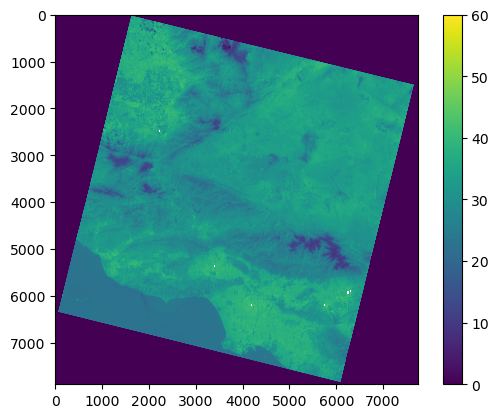

In [34]:
# Plot the 2020-04-14 BT data
plt.imshow(arr, vmin = 0, vmax = 60)
plt.colorbar()

In [35]:
# Load the 2020-08-20 BT data
fn =  fn_out = os.path.join('./data/', 'BT_20200820.tif')
arr = rasterio.open(fn).read(1)

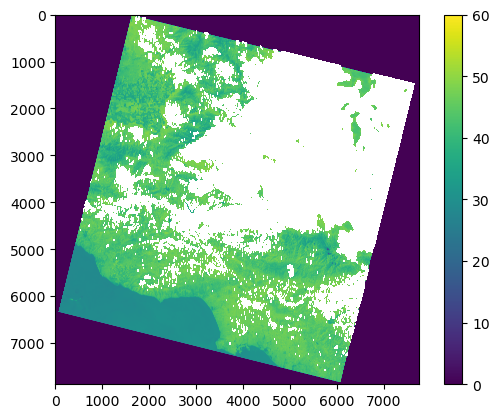

In [36]:
# Plot the 2020-08-20 BT data
plt.imshow(arr, vmin = 0, vmax = 60)
plt.colorbar()

In [37]:
# Calculate the difference between 2020-08-20 and 2020-04-14 BT data

# Load the 2020-04-14 BT data
fn = os.path.join('./data/', 'BT_20200414.tif')
arr0414 = rasterio.open(fn).read(1)

# Load the 2020-08-20 BT data
fn =  fn_out = os.path.join('./data/', 'BT_20200820.tif')
arr0820 = rasterio.open(fn).read(1)

In [38]:
arr0414.shape

(7891, 7751)

In [39]:
arr0820.shape 

(7881, 7761)

In [40]:
arr0415_n = arr0414[:7881,:]
arr0415_n.shape

(7881, 7751)

In [41]:
arr0820_n = arr0820[:,:7751]
arr0820_n.shape

(7881, 7751)

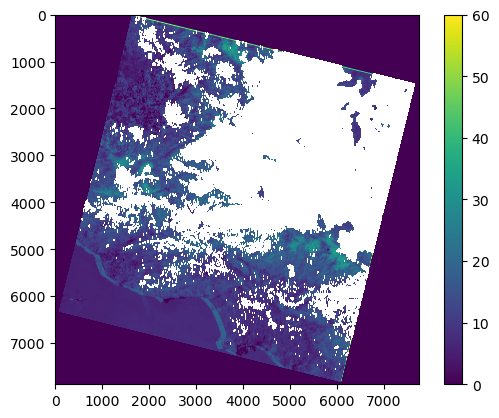

In [42]:
# Plot the difference between 2020-08-20 and 2020-04-14 BT data
dif = arr0820_n - arr0415_n

plt.imshow(dif, vmin = 0, vmax = 60)
plt.colorbar()

# Part 4


![Richmond](./assets/ndvi.png)

Vegetation in LA will be characterized by the [Normalized Difference Vegetation Index (NDVI)](https://www.usgs.gov/landsat-missions/landsat-normalized-difference-vegetation-index#:~:text=NDVI%20is%20used%20to%20quantify), which is a widely-used measure of “greenness” and higher values of NDVI indicate a greater amount of green vegetation within each neighborhood. From USGS (text is quoted):

NDVI is used to quantify vegetation greenness and is useful in understanding vegetation density and assessing changes in plant health. NDVI is calculated as a ratio between the red (R) and near infrared (NIR) values in traditional fashion: 
    
    (NIR - R) / (NIR + R)
    In Landsat 4-7, NDVI = (Band 4 – Band 3) / (Band 4 + Band 3).
    In Landsat 8-9, NDVI = (Band 5 – Band 4) / (Band 5 + Band 4).
 
**The equations produce a bounded index of -1 to 1.** <br>

Basically, NDVI use the ratio of red and near-red colors to see how green something on the ground is. This is because less green objects tend to be darker in the visable R spectrul (e.g. absorb a lot of red light) and bright in the NIR (relfect/emit a lot of NIR). That's why plants look great to us!


In [43]:
# Function to create NDVI from Landsat 8 raw DN

def ndvi(b4_fn, b5_fn, out_fn):
    """Funciton writes an NDVI image from Landsat 8. Will throw an error for 0 values in Landsat edges.
    Args:
        b4_fn = path to Landsat8 band 4 (red) geotif
        b5_fn = path to Landsat8 band 5 (NIR) geotif
        fn_out = path and name to write out ndvi file
    """
    
    # Get meta data to write file
    meta = rasterio.open(b4_fn).meta
    meta.update({'dtype': 'float32'})
    
    # Open the band data as arrays
    band4 = rasterio.open(b4_fn).read(1) #Red
    band5 = rasterio.open(b5_fn).read(1) #NIR
    
    # NDVI = (NIR — VIS)/(NIR + VIS) 
    ndvi = np.nan_to_num((band5 - band4)/(band5 + band4))
    ndvi = np.float32(ndvi) # reduce size
    
    # write our raster to disk
    with rasterio.open(out_fn, 'w', **meta) as out:
        out.write_band(1, ndvi)

    print('NDVI done')

### Process 2020-04-14 NDVI

In [44]:
# Set up file paths
data_in = os.path.join(file_path, 'landsat/Level1/LC08_L1TP_041036_20200414_20200423_01_T1')
b4 = os.path.join(data_in, 'LC08_L1TP_041036_20200414_20200423_01_T1_B4.TIF')
b5 = os.path.join(data_in, 'LC08_L1TP_041036_20200414_20200423_01_T1_B5.TIF')
fn_out = os.path.join('./data/', 'NDVI_20200414.tif')

In [45]:
# Process the data
ndvi(b4, b5, fn_out)

/tmp/ipykernel_3487832/1625411570.py:20: RuntimeWarning: divide by zero encountered in divide
  ndvi = np.nan_to_num((band5 - band4)/(band5 + band4))
/tmp/ipykernel_3487832/1625411570.py:20: RuntimeWarning: invalid value encountered in divide
  ndvi = np.nan_to_num((band5 - band4)/(band5 + band4))
/tmp/ipykernel_3487832/1625411570.py:21: RuntimeWarning: overflow encountered in cast
  ndvi = np.float32(ndvi) # reduce size


NDVI done


### Process 2020-08-20 NDVI

In [46]:
# Set up file paths
data_in = os.path.join(file_path, 'landsat/Level1/LC08_L1TP_041036_20200820_20200905_01_T1/')
b4 = os.path.join(data_in, 'LC08_L1TP_041036_20200820_20200905_01_T1_B4.TIF')
b5 = os.path.join(data_in, 'LC08_L1TP_041036_20200820_20200905_01_T1_B5.TIF')
fn_out = os.path.join('./data/','NDVI_20200820.tif')

In [47]:
# Process the data
ndvi(b4, b5, fn_out)

/tmp/ipykernel_3487832/1625411570.py:20: RuntimeWarning: invalid value encountered in divide
  ndvi = np.nan_to_num((band5 - band4)/(band5 + band4))


NDVI done


### On your own ...

In [48]:
# Load the 2020-04-14 NDVI data
fn_out = os.path.join('./data/', 'NDVI_20200414.tif')
ndvi_0414 = rasterio.open(fn_out).read(1)

In [49]:
ndvi_0414

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, '2020-04-14 NDVI')

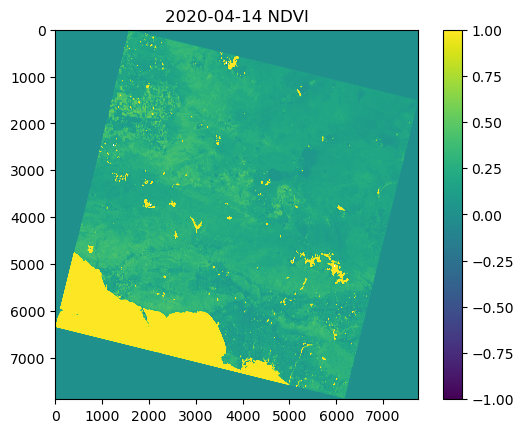

In [55]:
# Plot the 2020-04-14 NDVI data
plt.imshow(ndvi_0414, vmin = -1, vmax = 1)
plt.colorbar()
plt.title('2020-04-14 NDVI')

In [58]:
# Load the 2020-08-20 NDVI data
fn_out = os.path.join('./data/', 'NDVI_20200820.tif')
ndvi_0820 = rasterio.open(fn_out).read(1)

Text(0.5, 1.0, '2020-08-20 NDVI')

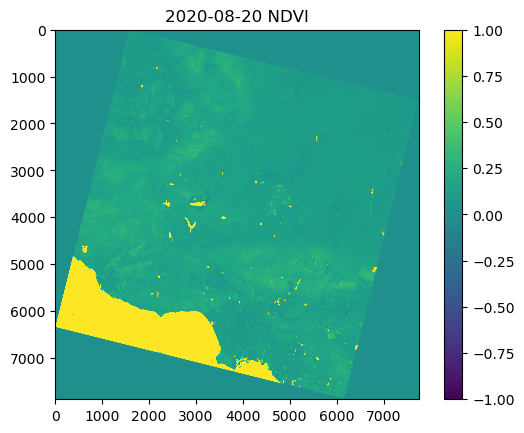

In [62]:
# Plot the 2020-08-20 NDVI data
plt.imshow(ndvi_0820, vmin = -1, vmax = 1)
plt.colorbar()
plt.title('2020-08-20 NDVI')

In [64]:
# Calculate the difference between 2020-08-20 and 2020-04-14 NDVI data
dif = ndvi_0820[:,:7751] - ndvi_0414[:7881,:]

Text(0.5, 1.0, 'NDVI Difference between 2020-08-20 and 2020-04-14')

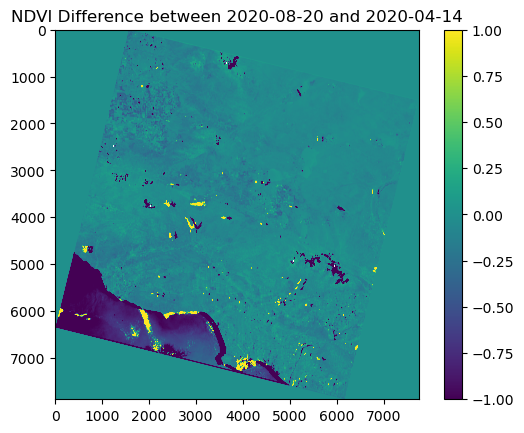

In [65]:
# Plot the difference between 2020-08-20 and 2020-04-14 NDVI data
plt.imshow(dif, vmin = -1, vmax = 1)
plt.colorbar()
plt.title('NDVI Difference between 2020-08-20 and 2020-04-14')

### Question 4: 
Given that the 2020-04-14 image is spring (e.g. wet) and the 2020-08-20 image is summer (e.g. dry) in LA, does the difference between 2020-08-20 and 2020-04-14 NDVI data make sense? Why or why not?

**Answer**: In LA, one would expect that the city is greener in the spring and less green later in the summer. With our two images from Aug. 20 and April 14, 2020, we see generally a decrease in NDVI across LA, with some curious exceptions. The clouds really pop out, as do increases on parts of the coastlines. Also, there is a strange increase in NDVI in the ocean. But otherwise, the data largely makes sense.

# Part 5

Now we need to estimate BT and NDVI for each neighborhood in LA. This requires using [rasters_stats](https://pythonhosted.org/rasterstats/) to calculate zonal statistics. In this case, we are going to do area-averaging of BT and NDVI. Doing so will add spatial uncertainty to our data because we are ascribing the same BT or NDVI value across an entire neigbhorhood (read about `all_touched` [here](https://pythonhosted.org/rasterstats/manual.html#zonal-statistics) as one example of possible error).

### Question 5:

What other issues of spatial uncertainty are introduced when overlaying vector data on raster data? Think about coastlines, reference systems, spatial resolution, etc. etc.  

**Answer**: Many issues can arise when stacking geospatial datasets, especially when mixing vector and raster data. First, is coordinate reference systems and projections. If the data are in disparate CRS/projection, then projecting the data will automatically distorate (1) area, (2) shape, (3) distance, and/or (4) direction. Second, vector data represent are discrete and precise locations in space, whereas faster data offers a continuous fields of data that can only offer information at the resolution of the raster dataset (e.g. a 25km raster cannot offer any information at a higher resolution than 25km). If you plot a vector on top of a raster, the vector data will likely split raster grid cells. This will create spatial uncertainty when trying to define what data from the raster should be included when merging the data. Or, let's say you have a point representing an entire city and you want to know the average temperature for that city from a rasters dataset. You you can extract exact infromation from the raster grid cells that overlap with that point but that will not provide any information for the entire surface of the city, or if the raster is bigger than the cities boundaries, it may provide temperature information that falls  outside the city boundries. 

In [66]:
# Function to find the area average

def zonal(rst_in, polys_in, do_stats): 
    """Function will run zonal stats on a raster and a set of polygons. All touched is set to True by default. 
    
    Args:
        rst_in = file name/path of raster to run zonal stats on
        polys = either list of shape files (watersheds) or single shape file (countries)
        do_stats = stats to use, see rasterstats package for documention, (use sume)
    """
    
    # project landsat to polygons crs
    polys_in = polys_in.to_crs({'init' :'epsg:32611'}) # CRS of Landsat tifs
    
    # Run Zonal Stats
    zs_feats = zonal_stats(polys_in, rst_in, stats= do_stats, geojson_out=True, all_touched=True)
        
    # Turn into geo data frame and rename column
    zgdf = gpd.GeoDataFrame.from_features(zs_feats, crs=polys_in.crs)
    
    return zgdf

In [67]:
# Get Polygon Geometry 
polys_in =neighborhoods[['Name', 'geometry']]

In [68]:
# Run Zonal stats - Throws error for Catalina Island which isn't in the scene 
rst_in = os.path.join('./data/','NDVI_20200414.tif')
ndvi_spring = zonal(rst_in, polys_in, 'mean')
ndvi_spring.rename(columns = {'mean' : 'NDVI_SPRING'}, inplace = True)

rst_in = os.path.join('./data/', 'NDVI_20200820.tif')
ndvi_summer = zonal(rst_in, polys_in, 'mean')
ndvi_summer.rename(columns = {'mean' : 'NDVI_SUMMER'}, inplace = True)

rst_in = os.path.join('./data/', 'BT_20200414.tif')
temp_spring = zonal(rst_in, polys_in, 'mean')
temp_spring.rename(columns = {'mean' : 'TEMP_SPRING'}, inplace = True)

rst_in = os.path.join('./data/', 'BT_20200820.tif')
temp_summer = zonal(rst_in, polys_in, 'mean')
temp_summer.rename(columns = {'mean' : 'TEMP_SUMMER'}, inplace = True)

/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/rasterstats/io.py:328: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(
/mnt/shared/moduleapps/EarthSci/Python-3.9.15-Mamba/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _p

In [69]:
# Check out one of the dataframes
temp_summer.head()

,geometry,Name,TEMP_SUMMER
0,"POLYGON Z ((389644.320 3822577.416 0.000, 3900...",Acton,49.034277
1,"POLYGON Z ((379165.011 3767076.745 0.000, 3794...",Adams-Normandie,46.614073
2,"POLYGON Z ((337601.925 3782208.879 0.000, 3376...",Agoura Hills,46.345871
3,"POLYGON Z ((384893.485 3824777.418 0.000, 3848...",Agua Dulce,48.845687
4,"POLYGON Z ((396534.303 3774370.656 0.000, 3965...",Alhambra,47.221423


### Merge Final Data

In [70]:
# Make a list of the zonal stats data frames
df_list = [ndvi_spring, ndvi_summer, temp_spring, temp_summer]

# Loop and merge the data frames onto 
for df in df_list:
    df.rename(columns = {'Name' : 'NEIGHBORHOOD'}, inplace = True)
    df_out = df_out.merge(df.iloc[:,1:3], on = 'NEIGHBORHOOD', how = 'left')

In [71]:
# Check out your final data
df_out.head()

,NEIGHBORHOOD,POPULATION PER SQMI,CRIME PER CAPITA,CRIME TOTAL,WHITE POPULATION,HOMEOWNERS,LATINO POPULATION,SINGLE PARENTS,BLACK POPULATION,DIVERSITY INDEX,ASIAN POPULATION,MEDIAN INCOME,NDVI_SPRING,NDVI_SUMMER,TEMP_SPRING,TEMP_SUMMER
0,Acton,166.0,0.0,0.0,0.82,0.88,0.12,0.09,0.01,0.316,0.02,83983.0,0.203897,0.136302,30.096359,49.034277
1,Adams-Normandie,21848.0,30.3,56.0,0.06,0.21,0.62,0.24,0.25,0.545,0.05,29606.0,0.110832,0.088282,38.373948,46.614073
2,Adams-Normandie,21848.0,29606.0,NaN,0.06,0.21,0.62,0.24,0.25,0.545,0.05,29606.0,0.110832,0.088282,38.373948,46.614073
3,Agoura Hills,2495.0,0.0,0.0,0.83,0.84,0.07,0.10,0.01,0.304,0.06,117608.0,0.254858,0.159426,34.428408,46.345871
4,Agua Dulce,99.0,0.0,0.0,0.84,0.87,0.11,0.05,0.00,0.282,0.00,106078.0,0.216954,0.133629,29.226854,48.845687


In [72]:
# Write CSV
fn_out = os.path.join('./data/','LA-all-SE-ENV-data')
df_out.to_csv(fn_out+'.csv', index = False)

In [73]:
# Write shape file
gdf_out = neighborhoods[['Name','geometry']] # get name and geom
gdf_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col
gdf_out = df_out.merge(gdf_out, on = 'NEIGHBORHOOD', how = 'right') # merge
gdf_out = gpd.GeoDataFrame(gdf_out) # cast to GeoPandas DF
gdf_out.to_file(fn_out+'.shp', index = False) # Write Shape file

/tmp/ipykernel_3487832/1944424254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_out.rename(columns={'Name':'NEIGHBORHOOD'}, inplace=True) # rename col
/tmp/ipykernel_3487832/1944424254.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_out.to_file(fn_out+'.shp', index = False) # Write Shape file


# Part 6

Finally, we have our dataset! Now, on your own, using `seaborn` and/or `matplotlib`, you will make a series of bi-variate plots where you look at the relationship between socioeconomic status, BT, and NDVI for LA. You will answer a series of questions as well.

### On your own ...

Text(0.5, 1.0, 'Relationship between Greenness and Temperature for LA, April 14 2020')

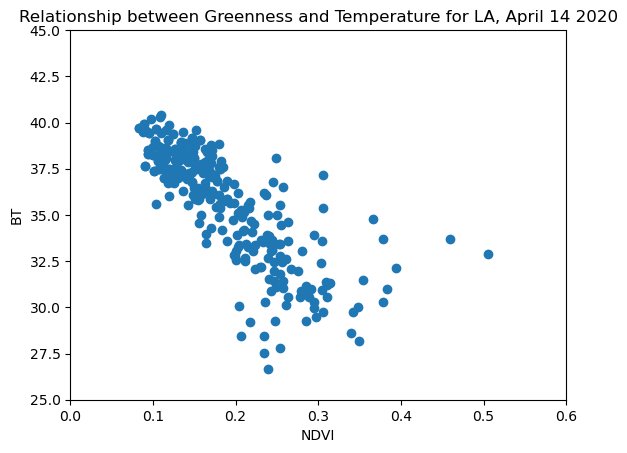

In [79]:
# plot the relationship between spring NDVI and spring BT
plt.scatter(gdf_out['NDVI_SPRING'], gdf_out['TEMP_SPRING'])
plt.xlim([0, 0.6])
plt.ylim([25,45])
plt.xlabel('NDVI')
plt.ylabel('BT')
plt.title('Relationship between Greenness and Temperature for LA, April 14 2020')

Text(0.5, 1.0, 'Relationship between Greenness and Temperature for LA, April 14 2020')

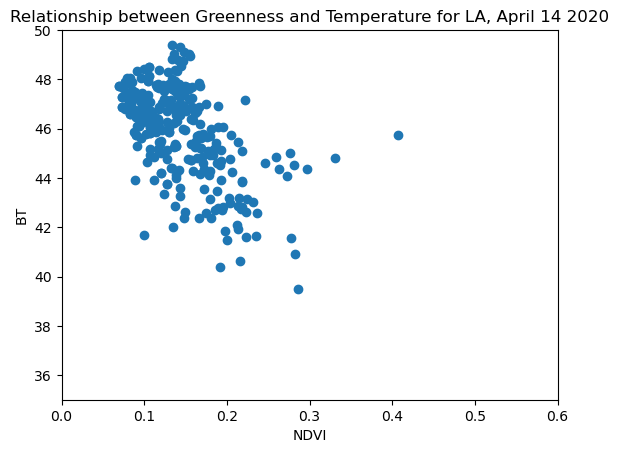

In [84]:
# plot the relationship between summer NDVI and summer BT
plt.scatter(gdf_out['NDVI_SUMMER'], gdf_out['TEMP_SUMMER'])
plt.xlim([0, 0.6])
plt.ylim([35, 50])
plt.xlabel('NDVI')
plt.ylabel('BT')
plt.title('Relationship between Greenness and Temperature for LA, April 14 2020')

### Question 6: 
At the neighborhood-level, how well correlated are NDVI and BT? Is the relationship stronger in spring or summer?
Why?

**Answer:** In LA, greenness and temperature are well-correlated, but the relationship appears stronger in spring than in summer. This is likely because, while in spring, few neighbhorhoods need to irreigate, in the summer, even as things heat up, some neighbhooods are likely able to irregate and keep their areas green. Further, while brightness temperature is not the same as land surface temperature nor air temperature, some urban materials will retain heat during the hotter August days than in the spring, for example, concrete will retain more temperature and have more radiated heat on a hotter day than cooler day. In other words, there is likely a stronger temperature differential for urban materials in August than in April. Because of irrigation and the temperature differential, there is likely a greater spread between NDVI and BT in August compared to April.

In [ ]:
# Now make 3-5 plots exploring the relationship between the various demographic and SE datasets. 

Text(0.5, 1.0, 'Relationship between Crime and Homeownership for LA')

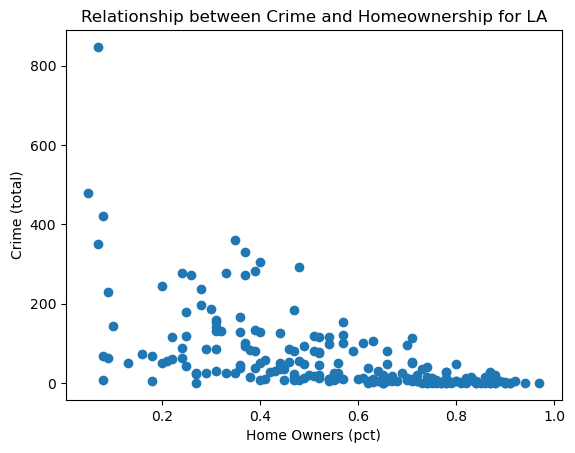

In [90]:
# Plot 1
plt.scatter(gdf_out['HOMEOWNERS'], gdf_out['CRIME TOTAL'])
# plt.xlim([0, 0.6])
# plt.ylim([25,45])
plt.xlabel('Home Owners (pct)')
plt.ylabel('Crime (total)')
plt.title('Relationship between Crime and Homeownership for LA')

Text(0.5, 1.0, 'Relationship between Median Inconme and Homeownership for LA')

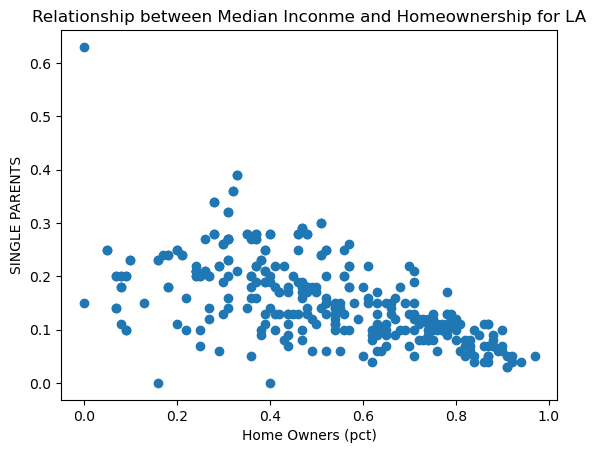

In [88]:
# Plot 2
plt.scatter(gdf_out['HOMEOWNERS'], gdf_out['MEDIAN INCOME'])
# plt.xlim([0, 0.6])
# plt.ylim([25,45])
plt.xlabel('Home Owners (pct)')
plt.ylabel('Median Income (USD)')
plt.title('Relationship between Median Income and Homeownership for LA')

Text(0.5, 1.0, 'Relationship between Single Parents and Homeownership for LA')

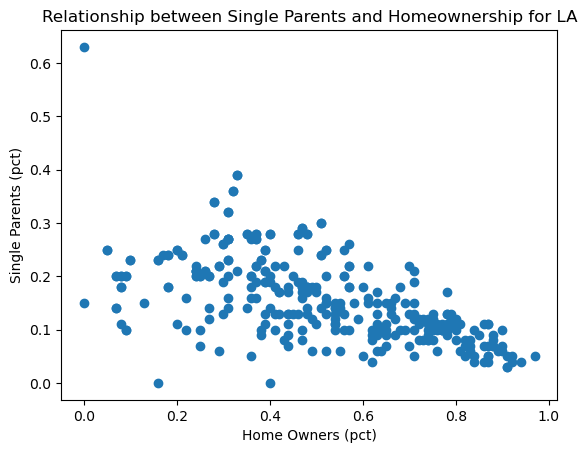

In [89]:
# Plot 3 
plt.scatter(gdf_out['HOMEOWNERS'], gdf_out['SINGLE PARENTS'])
# plt.xlim([0, 0.6])
# plt.ylim([25,45])
plt.xlabel('Home Owners (pct)')
plt.ylabel('Single Parents (pct)')
plt.title('Relationship between Single Parents and Homeownership for LA')

### Question 7: 
Which demographic and SE data are most well correlated at the neighbhorhood level? Why?

**Answer:** The three plots above show the relationship between percent homeownership and (1), crime (2) median income, and (3)single parents for LA neighbhorhoods. The tightest correlation for how owners is income, which makes sense: wealthier people tend to own their own how. Single parents tend to be lower income and thus have lower rates of home ownership. Crime is more dispersed. While there are higher rates of crime in neigborhoods with low rates of homeowners, once homeownership reaches about 50% the crime rates go way do and the correlation decreases. 

In [ ]:
# Now make 3-5 plots exploring the relationship between the various demographic and SE datasets and BT and NDVI?

Text(0.5, 1.0, 'Relationship between NDVI and Homeownership for LA')

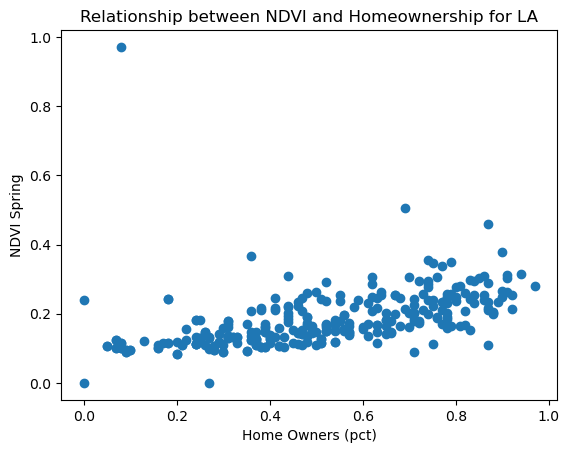

In [104]:
# Plot 1
plt.scatter(gdf_out['HOMEOWNERS'], gdf_out['NDVI_SPRING'])
# plt.xlim([0, 0.6])
# plt.ylim([25,45])
plt.xlabel('Home Owners (pct)')
plt.ylabel('NDVI Spring')
plt.title('Relationship between NDVI and Homeownership for LA')

Text(0.5, 1.0, 'Relationship between Total Crime and Spring NDVI for LA')

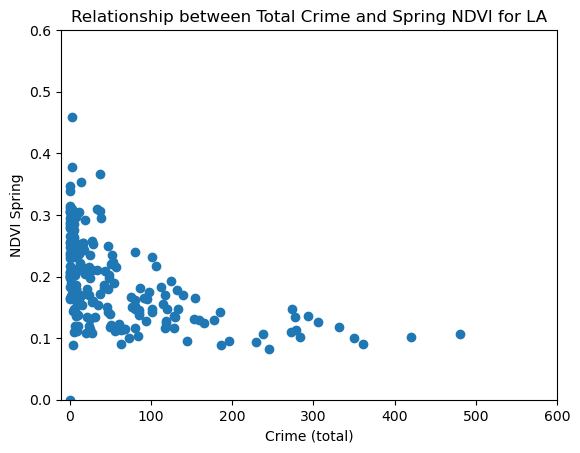

In [100]:
# Plot 2
plt.scatter(gdf_out['CRIME TOTAL'], gdf_out['NDVI_SPRING'])
plt.xlim([-10,600])
plt.ylim([0, 0.6])
plt.xlabel('Crime (total)')
plt.ylabel('NDVI Spring')
plt.title('Relationship between Total Crime and Spring NDVI for LA')

Text(0.5, 1.0, 'Relationship between BT Summer and Homeownership for LA')

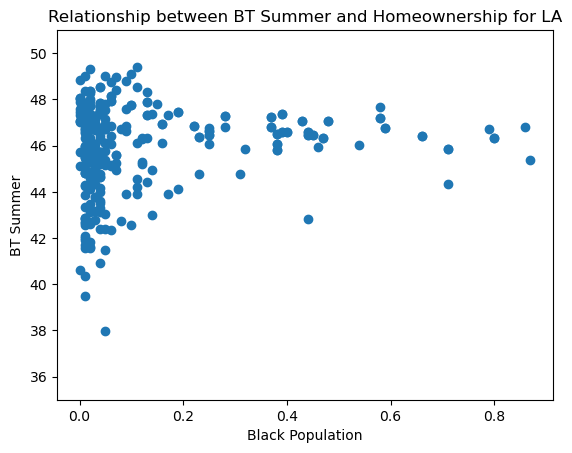

In [105]:
plt.scatter(gdf_out['BLACK POPULATION'], gdf_out['TEMP_SUMMER'])
# plt.xlim([-10,600])
plt.ylim([35, 51])
plt.xlabel('Black Population (pct)')
plt.ylabel('BT Summer')
plt.title('Relationship between BT Summer and Homeownership for LA')

### Question 8: 
Which demographic and SE data are most well correlated with BT and NDVI at the neighbhorhood level? Does BT or NDVI correlate better with demographic and SE data? Why? Which correlations, or lack of correlation, are most surprising?

**Answer:** The correlation between spring NDVI and homeownership in LA shows that higher rates of homeownership are in greener neighbhoods. Because of the tight compling between homeownership and wealther shown in the early plots, one can also deduce that richer people live in greener parts of LA. The relationship between crime and NDVI, and the percentage of black population and summer temperatures is less strong. However, it appears that neigbhorhoods with really high percent of black people tend to be hotter than other neighbhooods and that greenier neighbhoods tend to have fewer incidences of crime.